<h1> Question 1<h1>

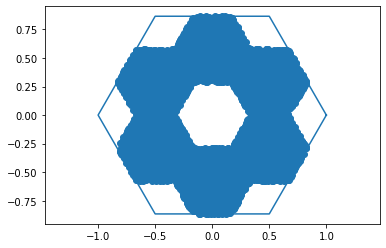

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry import Polygon

N = 10000

N_poly = 6
hexagon_points = [Point(np.cos(n*2*np.pi/N_poly),np.sin(n*2*np.pi/N_poly)) for n in range(N_poly)]
hexagon = Polygon(hexagon_points)

fig, ax = plt.subplots(1, 1);
x,y = hexagon.exterior.xy
plt.plot(x,y);
ax.axis('equal');

p = []
for k in range(N):
    r_point = Point(np.random.uniform(-1,1,1),np.sin(np.pi/3)*np.random.uniform(-1,1,1))
    while hexagon.contains(r_point)==False:
        r_point = Point(np.random.uniform(-1,1,1),np.sin(np.pi/3)*np.random.uniform(-1,1,1))
    #plt.scatter(r_point.x,r_point.y,color='red')
        
    rand_vert = np.random.randint(0, N_poly)
    triangle = Polygon([r_point, hexagon_points[rand_vert], hexagon_points[(rand_vert+np.random.randint(0, 2)*2-1)% N_poly]])
    #x,y = triangle.exterior.xy
    #plt.plot(x,y);
    
    p.append(triangle.centroid)
    #plt.scatter(p[k].x,p[k].y);
    
xs = [point.x for point in p]
ys = [point.y for point in p]
plt.scatter(xs, ys);

Six regular hexagons of equal size emerge, packed inside the "parent" hexagon. This also occurs for other regular polygons. For example, if "N_poly" is 3, three triangles emerge. 

<h1> Question 2 <h1>